In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time

In [3]:
sns.set()
pd.set_option('display.max_columns', None)

In [ ]:
# !pip install tapi-yandex-metrika

In [ ]:
# !pip install --upgrade tapi-yandex-metrika==2020.10.20

In [4]:
from tapi_yandex_metrika import YandexMetrikaStats

[Создание приложения](https://oauth.yandex.ru/client/new/)

Отладочный токен:
https://oauth.yandex.ru/authorize?response_type=token&client_id=e08c5606a4764d09b0bff31f36281c9a

In [5]:
from id_data import yandex

In [6]:
ACCESS_TOKEN = yandex['debugging_token']
METRIC_IDS = '24251461'

In [7]:
api = YandexMetrikaStats(
    authorization='OAuth a953489a3ad04025b24939841dfab1a2',
    access_token=ACCESS_TOKEN,
#     receive_all_data=True
)

Количество уникальных пользователей и визитов по дням за последние 30 дней

In [8]:
params = {
    'ids': METRIC_IDS, # наш счетчик
    'date1': '30daysAgo',
    'date2': 'yesterday',
    'sort': 'ym:s:date',
    'metrics': 'ym:s:users, ym:s:visits', # значения, которые получим
    'dimensions': 'ym:s:date', # группировка
    'accuracy': 'full',
    'limit': 1000 # количество элементов на странице
}

In [9]:
raw_result = api.stats().get(params=params)
raw_result

INFO:root:Наличие семплирования: False


<TapiClient object
[   {   'contains_sensitive_data': False,
        'data': [   {   'dimensions': [{'name': '2023-03-31'}],
                        'metrics': [97.0, 104.0]},
                    {   'dimensions': [{'name': '2023-04-01'}],
                        'metrics': [46.0, 49.0]},
                    {   'dimensions': [{'name': '2023-04-02'}],
                        'metrics': [34.0, 42.0]},
                    {   'dimensions': [{'name': '2023-04-03'}],
                        'metrics': [100.0, 107.0]},
                    {   'dimensions': [{'name': '2023-04-04'}],
                        'metrics': [126.0, 135.0]},
                    {   'dimensions': [{'name': '2023-04-05'}],
                        'metrics': [120.0, 133.0]},
                    {   'dimensions': [{'name': '2023-04-06'}],
                        'metrics': [129.0, 143.0]},
                    {   'dimensions': [{'name': '2023-04-07'}],
                        'metrics': [108.0, 115.0]},
                

In [13]:
result = raw_result().data[0]['data']

In [15]:
dict_data = {}

for i in range(len(result)):
    dict_data[i] = {
        'date': result[i]['dimensions'][0]['name'],
        'users': result[i]['metrics'][0],
        'visits': result[i]['metrics'][1]
    }

In [20]:
attendance = pd.DataFrame(dict_data).T

In [21]:
attendance

,date,users,visits
0,2023-03-31,97.0,104.0
1,2023-04-01,46.0,49.0
2,2023-04-02,34.0,42.0
3,2023-04-03,100.0,107.0
4,2023-04-04,126.0,135.0
5,2023-04-05,120.0,133.0
6,2023-04-06,129.0,143.0
7,2023-04-07,108.0,115.0
8,2023-04-08,47.0,48.0
9,2023-04-09,37.0,39.0


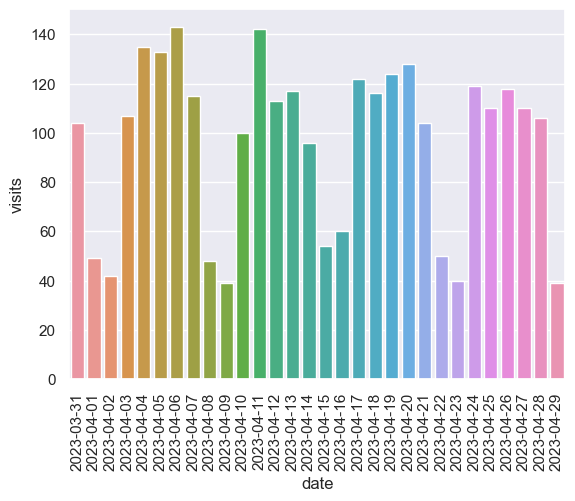

In [30]:
sns.barplot(data=attendance, x='date', y='visits')
plt.xticks(rotation=90);

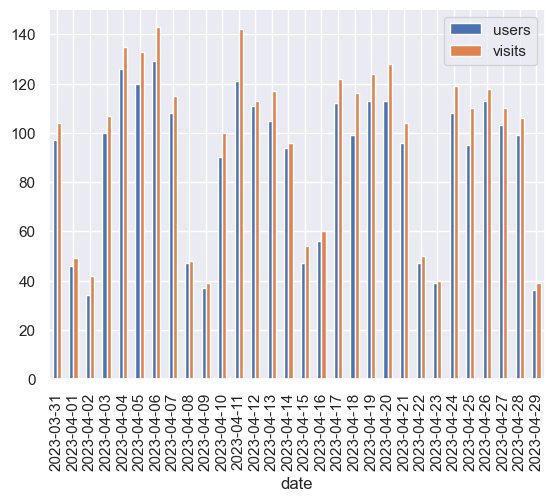

In [28]:
attendance.plot.bar(x='date');